# Prepare os dados

In [1]:
# importando bibliotecas
import pandas as pd 
from sklearn.metrics import mean_absolute_error
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
# neste trecho de código, uma lista de tuplas chamada "arquivos" é criada. Cada tupla contém o caminho do arquivo local e o caminho do arquivo da practicum.
arquivos = [('Downloads/gold_recovery_train.csv', '/datasets/gold_recovery_train.csv'),
            ('Downloads/gold_recovery_test.csv', '/datasets/gold_recovery_test.csv'),
            ('Downloads/gold_recovery_full.csv', '/datasets/gold_recovery_full.csv')]

# aqui, uma lista vazia chamada "df_list" é criada para armazenar os três conjuntos de dados depois de serem lidos.
# o próximo passo é iterar sobre a lista de tuplas "arquivos", abrindo cada arquivo CSV e armazenando-o como um DataFrame.
# se houver um erro ao abrir o arquivo local, o código tentará abrir o arquivo da practicum.
# cada DataFrame é adicionado à lista "df_list".
df_list = []
for local, dataset in arquivos:
    try:
        df = pd.read_csv(local)
    except:
        df = pd.read_csv(dataset)

    df_list.append(df)

# por fim, os três conjuntos de dados são atribuídos às variáveis df1, df2 e df3.
df_train, df_test, df_full = df_list

In [3]:
# transformar a coluna 'date' em índice dos três data frames
df_train.set_index('date', inplace=True)
df_test.set_index('date', inplace=True)
df_full.set_index('date', inplace=True)

In [4]:
# função para imprimir os DataFrames
def print_df (df):
    display(df.head())
    print()
    print(df.info())
    print()
    print('Número de duplicatas:',df.duplicated().sum())
    print()
    print('Porcentagem de valores ausentes em todo o DataFrame:',(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100)

In [5]:
# aplicando a função print_df
print_df(df_train)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691



<class 'pandas.core.frame.DataFrame'>
Index: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                            

In [6]:
# aplicando a função print_df
print_df(df_test)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333



<class 'pandas.core.frame.DataFrame'>
Index: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5554 non-null   float64
 1   primary_cleaner.input.depressant            5572 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5690 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5840 non-nul

In [7]:
# aplicando a função print_df
print_df(df_full)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691



<class 'pandas.core.frame.DataFrame'>
Index: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  float64
 8   final.output.tail_au                            

Vamos fazer o pré-procesamento

Existem valores nulos nos três DataFrames, podemos ver que não existe nehuma coluna com um número grande de valores ausentes e o total de valores ausentes nos DataFrames é pequeno então vamos excluir as linhas com esses valores ausentes.

In [8]:
# apagando valores ausentes dos dataframes
df_full = df_full.dropna()
df_test = df_test.dropna()
df_train = df_train.dropna()

**1.2.** Verifique se a quantidade retirada foi calculada corretamente. Usando o conjunto de treinamento, calcule a quantidade retirada para a característica rougher.output.recovery. Encontre o EAM entre seus cálculos e os valores das características. Forneça resultados.

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11017 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         11017 non-null  float64
 1   final.output.concentrate_pb                         11017 non-null  float64
 2   final.output.concentrate_sol                        11017 non-null  float64
 3   final.output.concentrate_au                         11017 non-null  float64
 4   final.output.recovery                               11017 non-null  float64
 5   final.output.tail_ag                                11017 non-null  float64
 6   final.output.tail_pb                                11017 non-null  float64
 7   final.output.tail_sol                               11017 non-null  float64
 8   final.output.tail_au                             

- C - rougher.output.concentrate_au
- F - rougher.input.feed_au
- T - rougher.output.tail_au

**Fórmula:**

C * (F-T)
  
--------------- * 100%
  
F * (C-T)

In [10]:
# o uso do copy() é para evitar o aviso de SettingWithCopyWarning
df_train_copy = df_train.copy()
C = df_train_copy['rougher.output.concentrate_au']
F = df_train_copy['rougher.input.feed_au']
T = df_train_copy['rougher.output.tail_au']
df_train_copy['recovery'] = ((C * (F - T)) / (F * (C - T))) * 100
df_train = df_train_copy

In [11]:
# calculando o erro absoluto médio entre as duas colunas
eam = mean_absolute_error(df_train['recovery'], df_train['rougher.output.recovery'])
# imprimindo eam
print('O EAM - Erro absoluto médio é de:', eam)
# print das duas colunas lado a lado
df_train[['recovery', 'rougher.output.recovery']].head()

O EAM - Erro absoluto médio é de: 9.460144184559453e-15


,recovery,rougher.output.recovery
date,,
2016-01-15 00:00:00,87.107763,87.107763
2016-01-15 01:00:00,86.843261,86.843261
2016-01-15 02:00:00,86.842308,86.842308
2016-01-15 03:00:00,87.226430,87.226430
2016-01-15 04:00:00,86.688794,86.688794


O EAM de 9.460144184559453e-15 é muito baixo, o que sugere que os cálculos realizados na coluna 'rougher.output.recovery' estão muito próximos dos valores esperados. 

In [12]:
# obter a lista de colunas presentes no DataFrame "df_train" que não estão presentes no DataFrame "df_test"
# utilizamos o método "difference" das colunas dos dois DataFrames para obter essa lista
colunas_train_sem_test = df_train.columns.difference(df_test.columns)

# imprimir as informações dessas colunas usando o método "info()" para o DataFrame "df_train",
# passando apenas as colunas presentes em "colunas_train_sem_test"
print(df_train[colunas_train_sem_test].info())

<class 'pandas.core.frame.DataFrame'>
Index: 11017 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 35 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         11017 non-null  float64
 1   final.output.concentrate_au                         11017 non-null  float64
 2   final.output.concentrate_pb                         11017 non-null  float64
 3   final.output.concentrate_sol                        11017 non-null  float64
 4   final.output.recovery                               11017 non-null  float64
 5   final.output.tail_ag                                11017 non-null  float64
 6   final.output.tail_au                                11017 non-null  float64
 7   final.output.tail_pb                                11017 non-null  float64
 8   final.output.tail_sol                            

# Analise os dados

**Observe como a concentração de metais (Au, Ag, Pb) muda dependendo do estágio de purificação.**

**Valores possíveis para [stage]:**
- rougher — (Minério bruto) flotação
- primary_cleaner — purificação primária
- secondary_cleaner — purificação secundária
- final — características finais

In [13]:
# expressão regular para encontrar colunas que terminam com "au", "ag" ou "pb" e contenham a palavra "concentrate"
regex = re.compile('.*concentrate_(au|ag|pb)$')

# filtra as colunas do DataFrame que correspondem à expressão regular
filtered_cols = df_full.filter(regex=regex)

# lista das colunas que terminam com "au"
au_cols = [col for col in filtered_cols.columns if col.endswith('au')]

# lista das colunas que terminam com "ag"
ag_cols = [col for col in filtered_cols.columns if col.endswith('ag')]

# lista das colunas que terminam com "pb"
pb_cols = [col for col in filtered_cols.columns if col.endswith('pb')]

# ordenando a lista para imprimir os estágios na ordem correta
au_cols.sort(reverse=True)
ag_cols.sort(reverse=True)
pb_cols.sort(reverse=True)

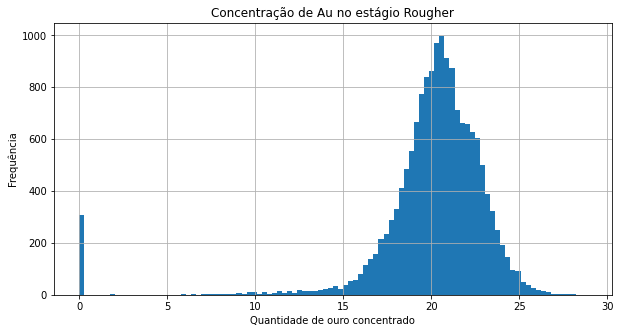

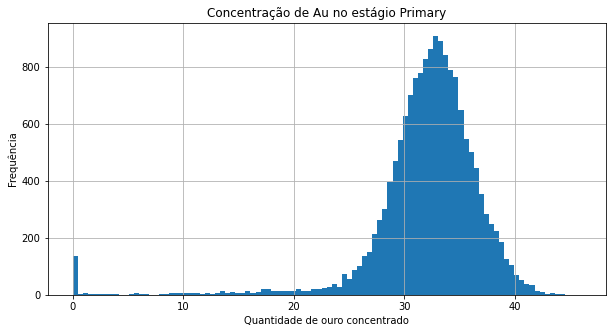

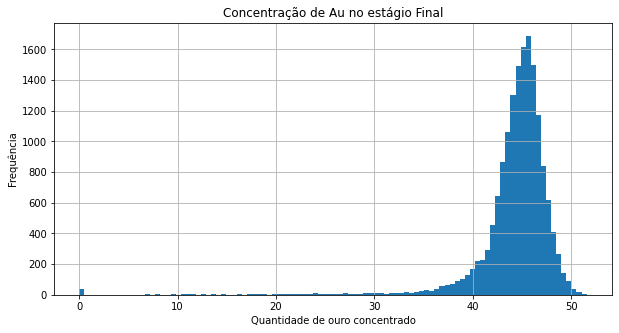

In [14]:
# loop que percorre todas as colunas da lista au_cols (Au)
for col_name in au_cols:
    
    # extrai o nome do estágio da coluna
    stage_name = col_name.split('.')[-3].split('_')[0]
    
    # plota o histograma para a coluna atual
    df_full[col_name].hist(bins=100, figsize=(10, 5))
    
    # adiciona um título ao eixo x
    plt.xlabel('Quantidade de ouro concentrado')
    
    # adiciona um título ao eixo y
    plt.ylabel('Frequência')
    
    # adiciona um título ao histograma com o nome do estágio em letra maiúscula
    plt.title('Concentração de Au no estágio {}'.format(stage_name.capitalize()))
    
    # exibe o histograma
    plt.show()

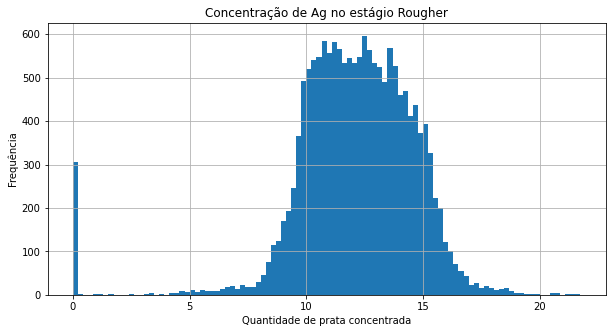

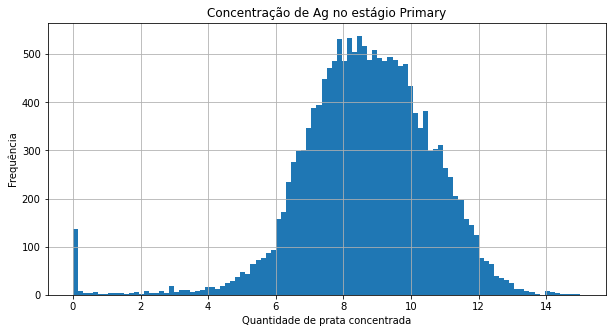

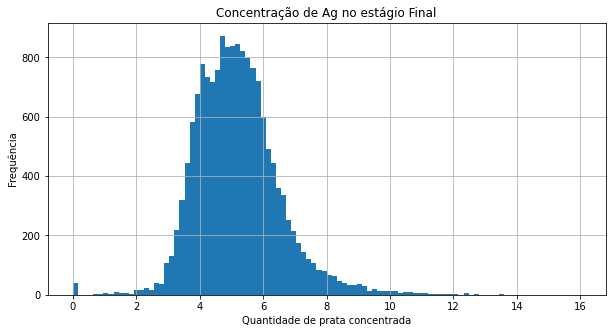

In [15]:
# loop que percorre todas as colunas da lista ag_cols (ag)
for col_name in ag_cols:
    
    # extrai o nome do estágio da coluna
    stage_name = col_name.split('.')[-3].split('_')[0]
    
    # plota o histograma para a coluna atual
    df_full[col_name].hist(bins=100, figsize=(10, 5))
    
    # adiciona um título ao eixo x
    plt.xlabel('Quantidade de prata concentrada')
    
    # adiciona um título ao eixo y
    plt.ylabel('Frequência')
    
    # adiciona um título ao histograma com o nome do estágio em letra maiúscula
    plt.title('Concentração de Ag no estágio {}'.format(stage_name.capitalize()))
    
    # exibe o histograma
    plt.show()

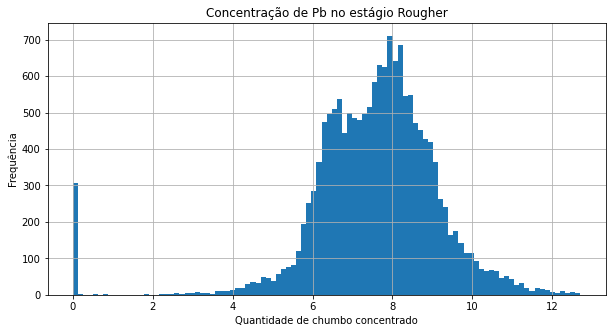

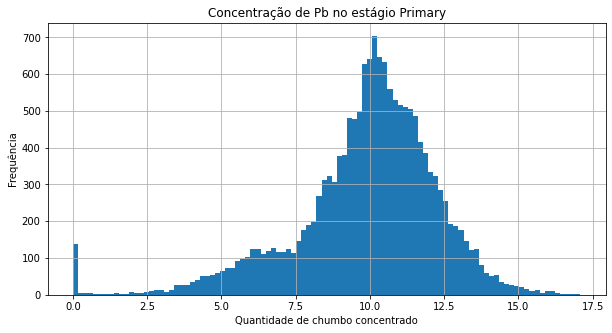

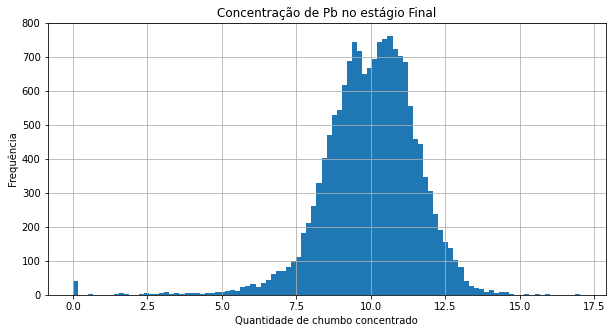

In [16]:
# loop que percorre todas as colunas da lista pb_cols (pb)
for col_name in pb_cols:
    
    # extrai o nome do estágio da coluna
    stage_name = col_name.split('.')[-3].split('_')[0]
    
    # plota o histograma para a coluna atual
    df_full[col_name].hist(bins=100, figsize=(10, 5))
    
    # adiciona um título ao eixo x
    plt.xlabel('Quantidade de chumbo concentrado')
    
    # adiciona um título ao eixo y
    plt.ylabel('Frequência')
    
    # adiciona um título ao histograma com o nome do estágio em letra maiúscula
    plt.title('Concentração de Pb no estágio {}'.format(stage_name.capitalize()))
    
    # exibe o histograma
    plt.show()

**Compare as distribuições de tamanho de partícula de minério no conjunto de treinamento e no conjunto de teste.**

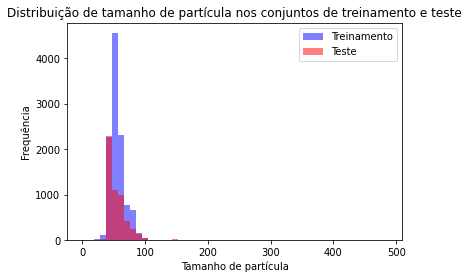

In [17]:
# define as colunas de tamanho de partícula nos conjuntos de treinamento e teste
train_feed_size = df_train['rougher.input.feed_size']
test_feed_size = df_test['rougher.input.feed_size']

# define os parâmetros do histograma
bins = 50
alpha = 0.5
color_train = 'blue'
color_test = 'red'

# plota os histogramas
plt.hist(train_feed_size, bins=bins, alpha=alpha, color=color_train, label='Treinamento')
plt.hist(test_feed_size, bins=bins, alpha=alpha, color=color_test, label='Teste')

# adiciona legendas e títulos
plt.legend(loc='upper right')
plt.xlabel('Tamanho de partícula')
plt.ylabel('Frequência')
plt.title('Distribuição de tamanho de partícula nos conjuntos de treinamento e teste')

# exibe o gráfico
plt.show()

Observamos que as distribuições são semelhantes, porém a principal diferença é a frequência, que é maior no conjunto de treinamento.

**Considere as concentrações totais de todas as substâncias em diferentes estágios:**
- Minério bruto
- Concentrado bruto 
- Concentrado final.

In [18]:
def search_columns(df, words_list):
    
    # inicializa uma lista vazia para armazenar os nomes das colunas que contêm todas as palavras da lista de busca
    columns_list = []
    
    # itera sobre todas as colunas do dataframe
    for col in df.columns:
        
        # inicializa uma variável para indicar se a coluna contém todas as palavras da lista de busca
        contains_words = True
        
        # itera sobre todas as palavras da lista de busca
        for word in words_list:
            
            # verifica se a palavra atual está presente no nome da coluna
            if word not in col:
                
                # se a palavra não está presente, define a variável contains_words como False e interrompe o loop
                contains_words = False
                
                break
                
        # verifica se todas as palavras da lista de busca estão presentes no nome da coluna
        if contains_words:
            
            # se todas as palavras estão presentes, adiciona o nome da coluna à lista de colunas que contêm todas as palavras da lista de busca
            columns_list.append(col)
    
    # retorna a lista de colunas encontradas
    return columns_list

In [19]:
# aplicando a função search_columns
rougher_input_concentrate = ['rougher','input','feed']
rougher_input_concentrate = search_columns(df_full,rougher_input_concentrate)

# aplicando a função search_columns
rougher_output_concentrate = ['rougher','output','concentrate']
rougher_output_concentrate = search_columns(df_full,rougher_output_concentrate)

# aplicando a função search_columns
final_output_concentrate = ['final','output','concentrate']
final_output_concentrate = search_columns(df_full,final_output_concentrate)

In [20]:
# este trecho de código utiliza o método .sum(axis=1) da biblioteca pandas para somar as colunas de concentração de cada estágio 
# o resultado é uma série de valores que contém a soma das concentrações de cada estágio do processo para cada linha do dataframe. 

# rougher_input_concentrate é uma lista com as colunas de concentração de entrada do rougher
rougher_input_total = df_full[rougher_input_concentrate].sum(axis=1).reset_index(drop=True)

# rougher_output_concentrate é uma lista com as colunas de concentração de saída do rougher
rougher_output_total = df_full[rougher_output_concentrate].sum(axis=1).reset_index(drop=True)

# final_output_concentrate é uma lista com as colunas de concentração de saída final
final_output_total = df_full[final_output_concentrate].sum(axis=1).reset_index(drop=True)

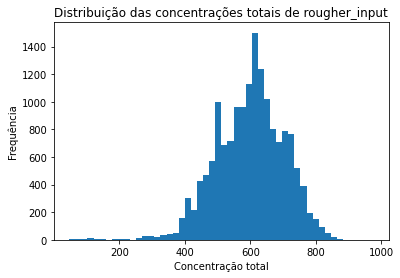

In [21]:
# cria um histograma com as concentrações totais do estágio rougher_input
plt.hist(rougher_input_total, bins=50)
plt.title("Distribuição das concentrações totais de rougher_input")
plt.xlabel("Concentração total")
plt.ylabel("Frequência")
plt.show()

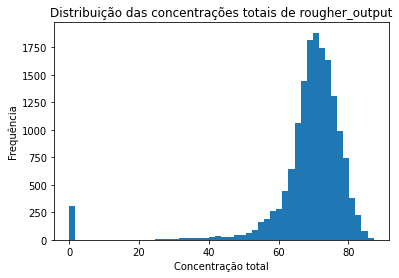

In [22]:
# cria um histograma com as concentrações totais do estágio rougher_output
plt.hist(rougher_output_total, bins=50)
plt.title("Distribuição das concentrações totais de rougher_output")
plt.xlabel("Concentração total")
plt.ylabel("Frequência")
plt.show()

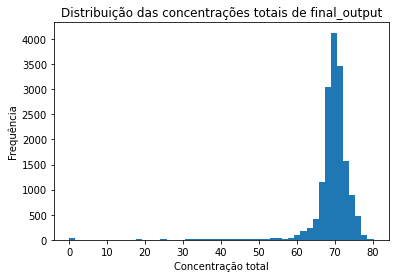

In [23]:
# cria um histograma com as concentrações totais do estágio final_output
plt.hist(final_output_total, bins=50)
plt.title("Distribuição das concentrações totais de final_output")
plt.xlabel("Concentração total")
plt.ylabel("Frequência")
plt.show()

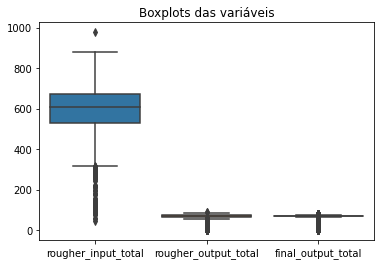

Valores discrepantes em rougher_input_total:
88       198.515840
263      253.906974
464      310.254476
611       87.977176
636      288.243155
            ...    
15857    103.093033
15866    312.429856
15867    311.405842
15910    150.756387
15964    198.690339
Length: 133, dtype: float64

Valores discrepantes em rougher_output_total:
44       30.037199
45        0.000000
46        0.000000
47        0.000000
48        0.000000
           ...    
15702    54.041472
15751    42.790480
15782    30.613573
15944    39.693428
15952    43.117470
Length: 821, dtype: float64

Valores discrepantes em final_output_total:
6        63.156407
7        62.908843
25       62.494021
26       62.153926
27       62.309608
           ...    
15866    63.327874
15952    55.612711
15953    27.339765
15954    13.261026
16033    61.681143
Length: 911, dtype: float64


In [24]:
def detect_outliers(data):
    Q1, Q3 = data.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return lower_bound, upper_bound, outliers

# exemplo de uso da função
lower_bound_ri, upper_bound_ri, outliers_ri = detect_outliers(rougher_input_total)
lower_bound_ro, upper_bound_ro, outliers_ro = detect_outliers(rougher_output_total)
lower_bound_fo, upper_bound_fo, outliers_fo = detect_outliers(final_output_total)

# cria boxplots com as três variáveis para visualizar os outliers
sns.boxplot(data=[rougher_input_total, rougher_output_total, final_output_total])
plt.title("Boxplots das variáveis")
plt.xticks([0, 1, 2], ["rougher_input_total", "rougher_output_total", "final_output_total"])
plt.show()

# imprime os valores discrepantes para cada variável
print("Valores discrepantes em rougher_input_total:")
print(outliers_ri)
print("\nValores discrepantes em rougher_output_total:")
print(outliers_ro)
print("\nValores discrepantes em final_output_total:")
print(outliers_fo)

In [25]:
# função para remover anomalias 
def outliers (df):
    
    df = df[df[rougher_input_concentrate].sum(axis=1) > 0]
    
    df = df[df[rougher_output_concentrate].sum(axis=1) > 0]
    
    df = df[df[final_output_concentrate].sum(axis=1) > 0]
    
    return df

Removendo outliers do DataFrame `df_full`

In [26]:
# aplicando a função outliers para remover
df_full = outliers(df_full)
df_full.shape

(15753, 86)

# Construir o modelo

Criando uma lista das colunas e aplicando as colunas que devem estar no `df_test`.

In [27]:
# cria uma lista vazia para armazenar as sublistas de colunas
sublists = []

# aiciona as sublistas de colunas desejadas na lista sublists
sublists.append(rougher_input_concentrate)
sublists.append(rougher_output_concentrate)
sublists.append(final_output_concentrate)
sublists.append(['rougher.output.recovery', 'final.output.recovery'])

# cria uma lista completa de todas as colunas desejadas, estendendo as sublistas de colunas
list_full = []
for sublist in sublists:
    list_full.extend(sublist)
    
# seleciona todas as colunas da lsita list_full que também estão presentes no DataFrame df_full e as atribui ao objeto new_full
new_full = df_full.loc[:, list(list_full)] 
new_full.shape

(15753, 16)

In [28]:
new_test = df_test.merge(new_full, on = 'date')
new_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4969 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 68 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               4969 non-null   float64
 1   primary_cleaner.input.depressant            4969 non-null   float64
 2   primary_cleaner.input.feed_size             4969 non-null   float64
 3   primary_cleaner.input.xanthate              4969 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      4969 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    4969 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      4969 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    4969 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      4969 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    4969 non-null

Criando função para remover as inconsistencias entre os DataFrames

In [29]:
def remove_substrings_nome_coluna(df):
    
    # usa o método str.replace() para substituir as substrings '_x' e '_y' por uma string vazia nos nomes das colunas
    df.columns = df.columns.str.replace('_x$', '', regex=True).str.replace('_y$', '', regex=True)
    
    # retorna o DataFrame modificado
    return df

# aplica a função remove_substrings_nome_coluna() no DataFrame e salva os resultados novamente nessa variável
new_test = remove_substrings_nome_coluna(new_test)

# seleciona todas as colunas do dataframe 'new_test' exceto as colunas duplicadas,
# mantendo a primeira ocorrência e descartando as demais
new_test = new_test.loc[:, ~new_test.columns.duplicated(keep='first')]

**Removendo outlers**

In [30]:
# aplicando a função outliers para remover
df_train = outliers(df_train)
new_test = outliers(new_test)

**Separando o conjunto de dados**

In [31]:
# seleciona as colunas 'rougher.output.recovery' e 'final.output.recovery' do DataFrame df_train e as atribui ao objeto target_train
target_train = df_train[['rougher.output.recovery', 'final.output.recovery']]

# seleciona todas as colunas do DataFrame df_train que também estão presentes no DataFrame df_test e as atribui ao objeto features_train
features_train = df_train.loc[:, list(df_test.columns)]

# seleciona as colunas 'rougher.output.recovery' e 'final.output.recovery' do DataFrame new_test e as atribui ao objeto target_test
target_test = new_test[['rougher.output.recovery', 'final.output.recovery']]

# seleciona todas as colunas do DataFrame new_test que também estão presentes no DataFrame df_test e as atribui ao objeto features_test
features_test = new_test.loc[:, list(df_test.columns)]

**Escreva uma função para calcular o valor final sMAPE**

In [32]:
# função "def spmape(target, predictions)" que calcula a métrica SMAPE
def spmape(target, predictions):

    # calcula SMAPE para "rougher"
    rougher_diff = np.abs(target.iloc[:,0] - predictions[:,0])  # calcula a diferença absoluta entre os valores reais e previstos para "rougher"
    rougher_norm = (np.abs(target.iloc[:,0]) + np.abs(predictions[:,0]))/2  # calcula a média dos valores absolutos para "rougher" para normalizar o erro
    rougher_smape = np.mean((rougher_diff / rougher_norm) * 100)  # calcula o SMAPE para "rougher"

    # calcula SMAPE para "final"
    final_diff = np.abs(target.iloc[:,1] - predictions[:,1])  # calcula a diferença absoluta entre os valores reais e previstos para "final"
    final_norm = (np.abs(target.iloc[:,1]) + np.abs(predictions[:,1]))/2  # calcula a média dos valores absolutos para "final" para normalizar o erro
    final_smape = np.mean((final_diff / final_norm) * 100)  # calcula o SMAPE para "final"

    # calcula a média ponderada de SMAPE para "rougher" e "final"
    spmape = 0.25 * rougher_smape + 0.75 * final_smape  # calcula a média ponderada de SMAPE para "rougher" e "final"

    # retorna o valor final de SMAPE
    return spmape

**Modelo de Regressão Linear**

In [33]:
# instancia um objeto da classe LinearRegression
model_linear_regression = LinearRegression()

# executa a validação cruzada usando a função cross_val_score
# passando o modelo, as features e o target de treinamento e cv=5 para usar 5 folds
scores = cross_val_score(model_linear_regression, features_train, target_train, cv=5)

# calcula a média dos scores obtidos durante a validação cruzada
final_score = scores.mean()
final_score

-0.34657524797335315

In [34]:
# definindo um estado aleatório para gerar os subconjuntos de dados
state = np.random.RandomState(12345)

**Modelo de Árvore de Decisão**

In [35]:
# define o range de valores para max_depth
max_depth_values = range(1, 10)

# inicializa as variáveis que vão armazenar os resultados
best_depth = 0
best_score = -np.inf

#loop sobre os valores de max_depth
for max_depth in max_depth_values:
    # cria uma instância do modelo com o valor atual de max_depth
    model = DecisionTreeRegressor(max_depth=max_depth, random_state=state)


    # realiza a validação cruzada com 5 folds
    scores = cross_val_score(model, features_train, target_train, cv=5)

    # calcula a média das pontuações
    mean_score = np.mean(scores)

    # verifica se a média das pontuações é maior que a melhor pontuação registrada até agora
    if mean_score > best_score:
        # atualiza a melhor pontuação e o melhor valor de max_depth
        best_score = mean_score
        best_depth = max_depth
        
# imprime o melhor valor de max_depth e a melhor pontuação
print(f"Melhor valor de Max_Depth: {best_depth}")
print(f"Melhor pontuação: {best_score}")

Melhor valor de Max_Depth: 1
Melhor pontuação: -0.2350721591512516


**Modelo de Árvore de Decisão Aleatória**

In [36]:
# define o range de valores para max_depth e n_estimators
max_depth_values = range(1, 5)
n_estimators_values = range(1, 10, 3)

# inicializa as variáveis que vão armazenar os resultados
best_depth = 0
best_n_estimators = 0
best_score = -np.inf

# loop aninhado sobre os valores de max_depth e n_estimators
for max_depth in max_depth_values:
    for n_estimators in n_estimators_values:
        
        # cria uma instância do modelo com os valores atuais de max_depth e n_estimators
        model = RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators, random_state=state)

        # realiza a validação cruzada com 5 folds
        scores = cross_val_score(model, features_train, target_train, cv=5)

        # calcula a média das pontuações
        mean_score = np.mean(scores)

        # verifica se a média é maior que a melhor pontuação registrada até agora
        if mean_score > best_score:
            # atualiza os valores de best_score, best_depth e best_n_estimators
            best_score = mean_score
            best_depth = max_depth
            best_n_estimators = n_estimators
        
# imprime o melhor valor de max_depth, n_estimators e a melhor pontuação
print(f"Melhor valor de Max_Depth: {best_depth}")
print(f"Melhor valor de n_estimators: {best_n_estimators}")
print(f"Melhor pontuação: {best_score}")

Melhor valor de Max_Depth: 1
Melhor valor de n_estimators: 7
Melhor pontuação: -0.21811808146223108


In [37]:
# cria uma lista de colunas numéricas do DataFrame "features_train"
numeric_cols = features_train.select_dtypes(include=np.number).columns.tolist()

# cria uma instância da classe StandardScaler
scaler = StandardScaler()

# aplica a transformação de escala na lista de colunas numéricas do DataFrame "features_train"
features_train_scaled = scaler.fit_transform(features_train[numeric_cols])

# aplica a transformação de escala na lista de colunas numéricas do DataFrame "features_test"
features_test_scaled = scaler.transform(features_test[numeric_cols])

In [38]:
# define a lista de valores de depth que serão testados
depth_list = [5, 10, 15, 20]

# define a lista de valores de est que serão testados
est_list = [5, 10, 15]

# instancia um objeto da classe RandomForestRegressor
model = RandomForestRegressor(random_state=state)

best_score = 0
best_params = None

# loop para testar todas as combinações possíveis de depth e est
for max_depth in depth_list:
    for n_estimators in est_list:
        
        # instancia um novo objeto da classe RandomForestRegressor com os valores de depth e est atuais
        curr_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=state)

        # treina o modelo usando as features e target de treinamento
        curr_model.fit(features_train_scaled, target_train)

        # faz as previsões usando as features de teste
        predictions = curr_model.predict(features_test_scaled)

        # calcula o score atual usando a função spmape
        curr_score = spmape(target_test, predictions)

        # verifica se esse é o melhor score encontrado até agora
        if curr_score < best_score or best_score == 0:
            best_score = curr_score
            best_params = {'n_estimators': n_estimators, 'max_depth': max_depth}

# instancia um novo objeto da classe RandomForestRegressor com os melhores valores de depth e est encontrados
model = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], random_state=state)

# treina o modelo usando as features e target de treinamento
model.fit(features_train_scaled, target_train)

# faz as previsões usando as features de teste
predictions = model.predict(features_test_scaled)

spmapfinal = spmape(target_test, predictions)
spmapfinal

7.765738485881172

**Conclusão**

Durante a análise o ouro apresentou um aumento constante de concentração à medida que avançava de uma etapa para outra. Chegamos a conclusão que o modelo que apresentou mais a melhor pontuação foi o modelo de árvore de decisão aleatória com o melhor valor de depth: 1, melhor valor de estimators: 7, melhor pontuação: -0.21811808146223108.
Assim foi decidido seguir com o modelo de árvore de decisão aleatória e ele teve um valor final de sMAPE: ~ 7.7657384858811875.